In [1]:
# Install dependencies if needed
# !pip install langchain langchain-experimental langchain-chroma pillow open_clip_torch torch matplotlib unstructured pydantic
import os
from textbook_loading import (
    load_book,
    clean_and_categorize_elements,
    summarize_elements,
    store_in_chromadb,
    delete_irrelevant_images,
)


In [2]:
pdf_file = './data/MediumExample_Ears_17Pgs.pdf'
image_output_dir = './figures/Ears'
chroma_persist_dir = './chroma/Ears/'

# Make sure the data directory exists
assert os.path.exists('./data'), "Error: './data' directory not found."
assert os.path.exists(pdf_file), f"Error: PDF file not found at {pdf_file}."

In [3]:
print("📝 Unstructuring textbooks, filtering junks, semanic chunking...")
raw_pdf_elements = load_book(pdf_file, image_output_dir)
print("🎉 1.process_pdf_with_semantic_chunking complete.")


📝 Unstructuring textbooks, filtering junks, semanic chunking...


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


🎉 1.process_pdf_with_semantic_chunking complete.


In [4]:
# Clean and categorize
texts, tables, images_raw, headers_raw, titles_raw, footers_raw, figure_captions_raw, list_items_raw = clean_and_categorize_elements(raw_pdf_elements, window_size=2, min_meaningful_text_length=75)


In [5]:
# Summarize, store, etc.
text_summaries, table_summaries, image_paths, relevant_images_to_summarize, image_summaries = summarize_elements(
    texts, tables, images_raw
)

Texts and Tables Summary Done!
Checking image relevance with local textual context...
Skipping decorative image: ./figures/Ears/figure-1-1.jpg
Skipping decorative image: ./figures/Ears/figure-2-3.jpg
Skipping decorative image: ./figures/Ears/figure-3-5.jpg
Skipping decorative image: ./figures/Ears/figure-6-10.jpg
Skipping decorative image: ./figures/Ears/figure-8-12.jpg
Skipping decorative image: ./figures/Ears/figure-9-14.jpg
Skipping decorative image: ./figures/Ears/figure-10-15.jpg
Skipping decorative image: ./figures/Ears/figure-11-17.jpg
Skipping decorative image: ./figures/Ears/figure-12-18.jpg
Skipping decorative image: ./figures/Ears/figure-13-19.jpg
Skipping decorative image: ./figures/Ears/figure-14-20.jpg
Skipping decorative image: ./figures/Ears/figure-15-21.jpg
Skipping decorative image: ./figures/Ears/figure-16-22.jpg
Number of relevant images: 9
Generating LLM summaries for relevant images...


In [6]:
retriever = store_in_chromadb(
    text_summaries, texts, table_summaries, tables, image_paths,
    relevant_images_to_summarize, image_summaries,
    persist_directory=chroma_persist_dir
)

In [7]:
delete_irrelevant_images(images_raw, relevant_images_to_summarize)

Successfully deleted irrelevant image: ./figures/Ears/figure-1-1.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-2-3.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-3-5.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-6-10.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-8-12.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-9-14.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-10-15.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-11-17.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-12-18.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-13-19.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-14-20.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-15-21.jpg
Successfully deleted irrelevant image: ./figures/Ears/figure-16-22.jpg
Finished deleting images. Total deleted: 13


In [8]:
# import os
sound_file = "/System/Library/Sounds/Glass.aiff"
os.system(f"afplay '{sound_file}'")

0

# Inspecting Retrieved Docs

In [9]:
query = "What do cat intestinal parasites look like and how do they affect cats?"

---------------------------------------- Here are the retrieved original_docs with similarity scores ----------------------------------------


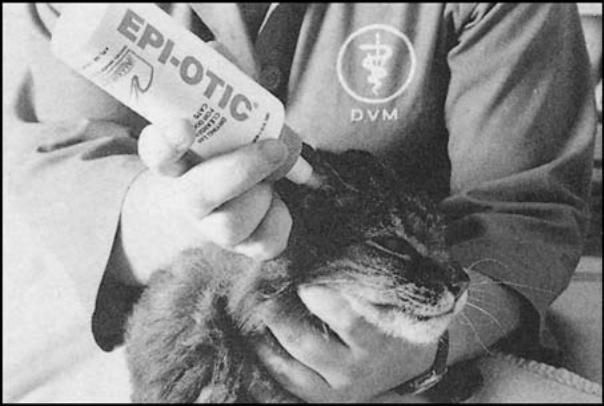

----------------------------------------
🔎 Similarity Score: 1.4114
🖼️ Modality: image
📝 Summary/Chunk: ./figures/Ears/figure-4-6.jpg
Summary Metadata: {'type': 'image', 'image_path': './figures/Ears/figure-4-6.jpg', 'doc_id': '9ac92912-1ced-4d3d-a89b-30cb4aded554', 'summary': "The image shows a veterinary assistant administering Epi-Otic to a cat's ear. The context suggests that this procedure involves preventing water from entering the cat's ears during bathing, which can prevent infections and treat any cuts or bites found in the pinna after a fight. It also mentions routine cleaning is not necessary but should be done when there is excessive wax buildup for maintaining tissue health."}
Doc ID: 9ac92912-1ced-4d3d-a89b-30cb4aded554


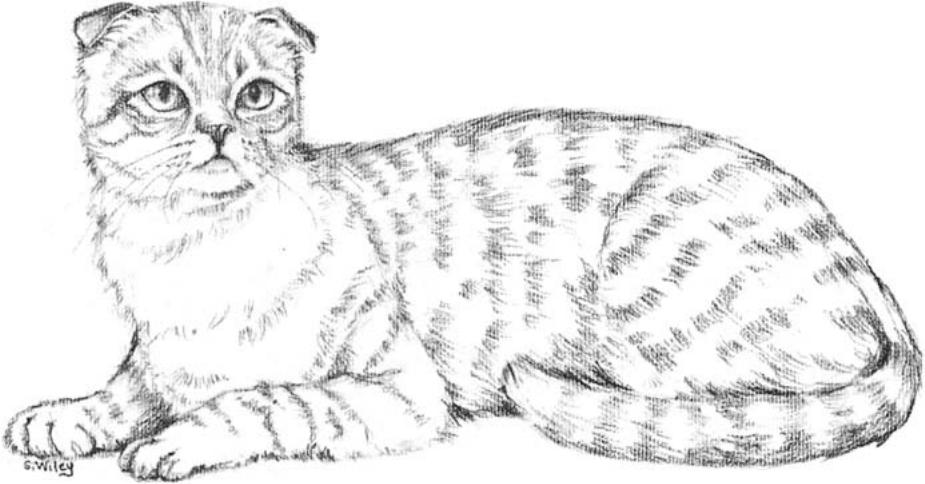

----------------------------------------
🔎 Similarity Score: 1.3992
🖼️ Modality: image
📝 Summary/Chunk: ./figures/Ears/figure-3-4.jpg
Summary Metadata: {'type': 'image', 'doc_id': 'de086559-946a-4b51-9c31-d30e27dd035f', 'summary': 'This image is not directly related to veterinary content. It appears to be an illustration of a cat with no specific focus on ears or any other anatomical feature relevant for veterinary purposes based on the provided local text context and filename information. The mention "THE EARS • 205" suggests it might relate to ear anatomy, but without further details, this cannot be confirmed from the image alone.', 'image_path': './figures/Ears/figure-3-4.jpg'}
Doc ID: de086559-946a-4b51-9c31-d30e27dd035f


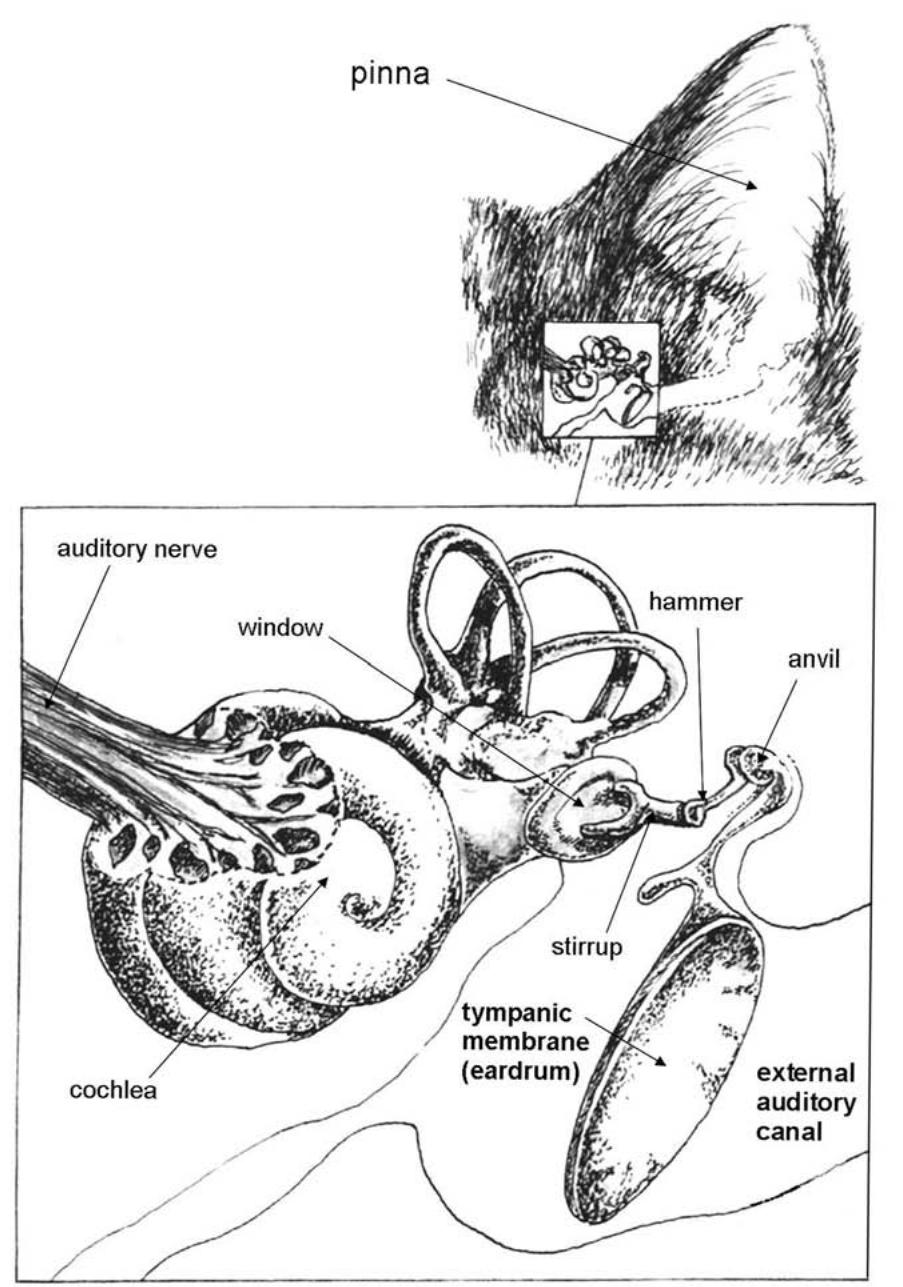

----------------------------------------
🔎 Similarity Score: 1.3781
🖼️ Modality: image
📝 Summary/Chunk: ./figures/Ears/figure-2-2.jpg
Summary Metadata: {'summary': "The provided image is an anatomical illustration depicting various components of the human auditory system. It includes labels for different parts such as pinna (external ear), auditory nerve, window (tympanic membrane or eardrum), hammer (incus), anvil (malleus), stirrup (stapes), cochlea, and external auditory canal. This type of diagram is commonly used in veterinary education to teach about the anatomy relevant for diagnosing conditions affecting animals' hearing systems.", 'type': 'image', 'doc_id': '19b09196-5c83-493e-b0c2-f2a932daec2f', 'image_path': './figures/Ears/figure-2-2.jpg'}
Doc ID: 19b09196-5c83-493e-b0c2-f2a932daec2f
----------------------------------------
🔎 Similarity Score: 1.3220
🖼️ Modality: image_summary
📝 Summary/Chunk: The image shows a veterinary assistant administering Epi-Otic to a cat's ear. The

In [10]:
from IPython.display import Image, display

print('-'*40, "Here are the retrieved original_docs with similarity scores",'-'*40)

results = retriever.retrieve_multi_modal(query, k=10)
for res in results:
    if res["modality"] == "image" and os.path.exists(res["summary"]):
        display(Image(filename=res["summary"]))
    print('-' * 40)
    print(f"🔎 Similarity Score: {res['score']:.4f}")
    print(f"🖼️ Modality: {res['modality']}")
    print("📝 Summary/Chunk:", res["summary"])
    print("Summary Metadata:", res["original_metadata"])
    print("Doc ID:", res["doc_id"])

In [11]:
# Only images
image_results = retriever.retrieve(query, k=10, filter={"type": "image"})
# Only text
text_results = retriever.retrieve(query, k=10, filter={"type": "text"})